In [1]:
from Utils.Helper import (
    load_eeg_data, compute_correlation_matrices, average_correlation_matrix,
    map_channels_to_regions, get_channel_positions, extract_features
)
from Utils.Plot_utils import (
    plot_correlation_matrix, plot_topomap, plot_topomap_with_regions, plot_raster
)
import mne
import os
import numpy as np

In [2]:
diff_files = [os.path.join("Diff_EEG",f'diff_{i+1:02}.edf') for i in range(14)]
diff_eeg_data = load_eeg_data(diff_files)

Extracting EDF parameters from d:\research-reservoir\Schizo-hormone\Diff_EEG\diff_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 211249  =      0.000 ...   844.996 secs...
Extracting EDF parameters from d:\research-reservoir\Schizo-hormone\Diff_EEG\diff_02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
Extracting EDF parameters from d:\research-reservoir\Schizo-hormone\Diff_EEG\diff_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
Extracting EDF parameters from d:\research-reservoir\Schizo-hormone\Diff_EEG\diff_04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 231249  =      0.000 ...   924.996 secs...
Extracting EDF parameters from d:\research-reservoir\Schizo-hormone\Diff

In [3]:
diff_coor_matrices = compute_correlation_matrices(diff_eeg_data)

In [4]:
avg_diff_coor_matrix = average_correlation_matrix(diff_coor_matrices)

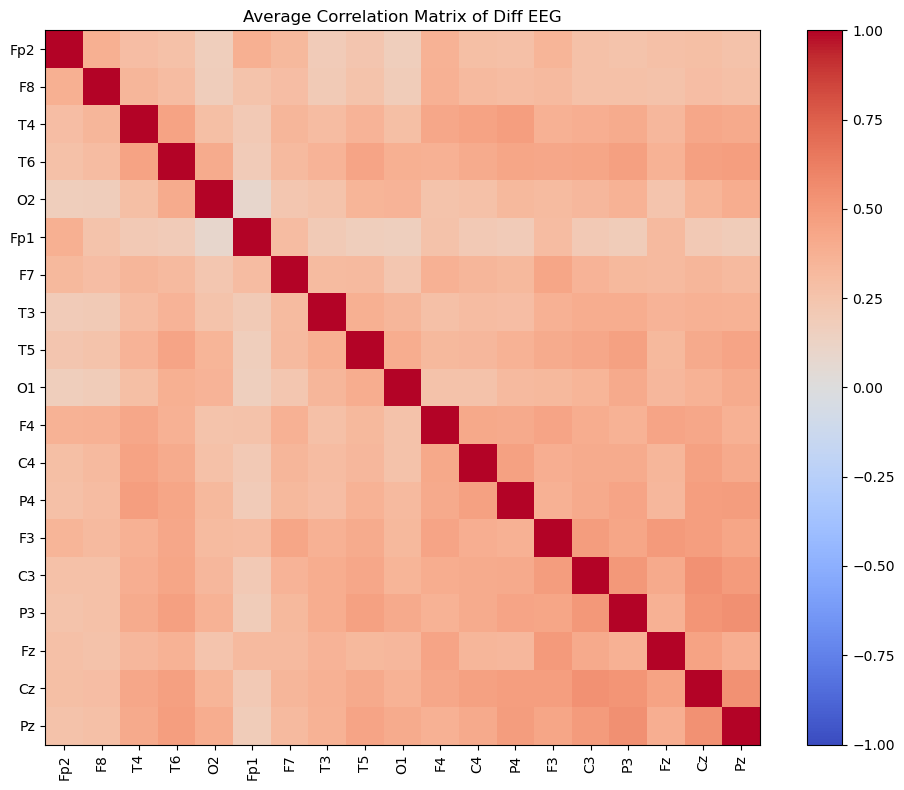

In [5]:
channel_names = diff_eeg_data[0].info['ch_names']
plot_correlation_matrix(avg_diff_coor_matrix,'Average Correlation Matrix of Diff EEG',channel_names)

In [6]:
region_names = map_channels_to_regions(channel_names)
positions = get_channel_positions(channel_names)

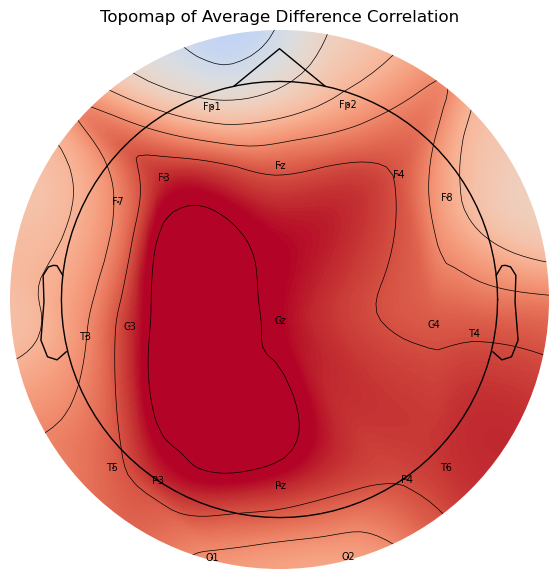

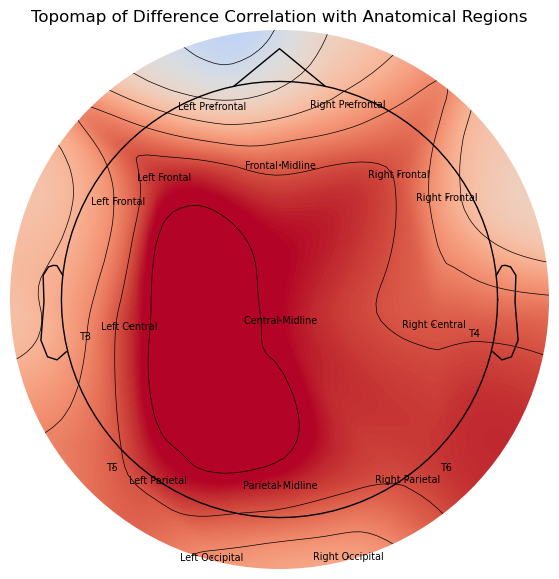

In [7]:
avg_diff_corr_per_channel = np.mean(avg_diff_coor_matrix, axis=1)
plot_topomap(avg_diff_corr_per_channel, channel_names, positions,
             'Topomap of Average Difference Correlation')
plot_topomap_with_regions(avg_diff_corr_per_channel, region_names,
                          positions, 'Topomap of Difference Correlation with Anatomical Regions')

In [8]:
diff_eeg_data[0].get_data().shape

(19, 211250)

In [9]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 

In [10]:
healthy_file_paths = [f'Data/h{i:02}.edf' for i in range(1, 15)]
schizophrenic_file_paths = [f'Data/s{i:02}.edf' for i in range(1, 15)]

In [11]:
healthy_eeg_data = load_eeg_data(healthy_file_paths)
schizophrenic_eeg_data = load_eeg_data(schizophrenic_file_paths)

Extracting EDF parameters from d:\research-reservoir\Schizo-hormone\Data\h01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 231249  =      0.000 ...   924.996 secs...
Extracting EDF parameters from d:\research-reservoir\Schizo-hormone\Data\h02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
Extracting EDF parameters from d:\research-reservoir\Schizo-hormone\Data\h03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
Extracting EDF parameters from d:\research-reservoir\Schizo-hormone\Data\h04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 231249  =      0.000 ...   924.996 secs...
Extracting EDF parameters from d:\research-reservoir\Schizo-hormone\Data\h05.edf...
EDF file detected
Se

In [12]:
healthy_corr_matrices = compute_correlation_matrices(healthy_eeg_data)
schizophrenic_corr_matrices = compute_correlation_matrices(
    schizophrenic_eeg_data)

In [13]:
diff_eeg_data = []
for h_corr, s_corr in zip(healthy_corr_matrices, schizophrenic_corr_matrices):
    diff_eeg_data.append(s_corr - h_corr)

In [14]:
diff_flattened = [diff.flatten() for diff in diff_eeg_data]
pca = PCA(n_components=2)
pca_result = pca.fit_transform(diff_flattened)

In [15]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(pca_result)

C:\Users\anisr\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


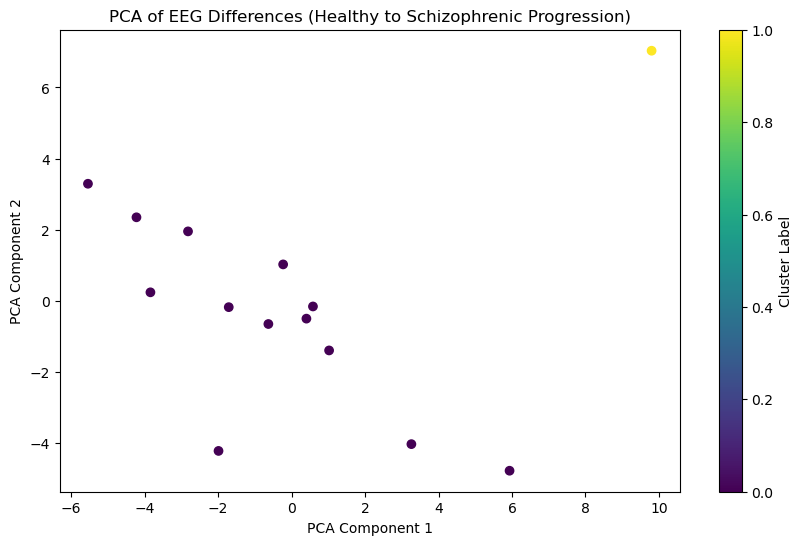

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis')
plt.title('PCA of EEG Differences (Healthy to Schizophrenic Progression)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [17]:
time_points = np.arange(len(diff_eeg_data))
pca_component1 = pca_result[:, 0]
pca_component2 = pca_result[:, 1]

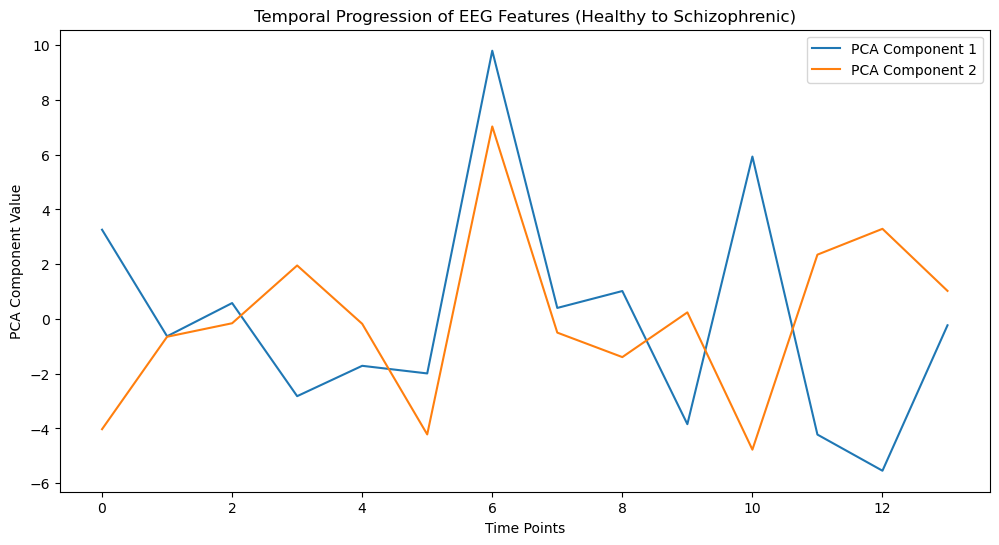

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(time_points, pca_component1, label='PCA Component 1')
plt.plot(time_points, pca_component2, label='PCA Component 2')
plt.title('Temporal Progression of EEG Features (Healthy to Schizophrenic)')
plt.xlabel('Time Points')
plt.ylabel('PCA Component Value')
plt.legend()
plt.show()

In [19]:
diff_eeg_data = load_eeg_data(diff_files)

healthy_features = extract_features(healthy_eeg_data)
schizophrenic_features = extract_features(schizophrenic_eeg_data)
diff_features = extract_features(diff_eeg_data)

Extracting EDF parameters from d:\research-reservoir\Schizo-hormone\Diff_EEG\diff_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 211249  =      0.000 ...   844.996 secs...
Extracting EDF parameters from d:\research-reservoir\Schizo-hormone\Diff_EEG\diff_02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
Extracting EDF parameters from d:\research-reservoir\Schizo-hormone\Diff_EEG\diff_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
Extracting EDF parameters from d:\research-reservoir\Schizo-hormone\Diff_EEG\diff_04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 231249  =      0.000 ...   924.996 secs...
Extracting EDF parameters from d:\research-reservoir\Schizo-hormone\Diff

In [20]:
print(f"Healthy Features Shape: {healthy_features.shape}")
print(f"Schizophrenic Features Shape: {schizophrenic_features.shape}")
print(f"Difference Features Shape: {diff_features.shape}")

Healthy Features Shape: (14, 361)
Schizophrenic Features Shape: (14, 361)
Difference Features Shape: (14, 361)


In [21]:
X = np.vstack((healthy_features, schizophrenic_features))
y = np.array([0] * len(healthy_features) + [1] * len(schizophrenic_features))

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier())
])

In [24]:
param_grid = [
    {
        'model': [RandomForestClassifier()],
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [None, 10, 20],
    },
    {
        'model': [SVC()],
        'model__kernel': ['linear', 'rbf'],
        'model__C': [0.1, 1, 10],
        'model__gamma': ['scale', 'auto']
    }
]

In [25]:
grid_search = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid=[{'model': [RandomForestClassifier()],
                          'model__max_depth': [None, 10, 20],
                          'model__n_estimators': [50, 100, 200]},
                         {'model': [SVC()], 'model__C': [0.1, 1, 10],
                          'model__gamma': ['scale', 'auto'],
                          'model__kernel': ['linear', 'rbf']}],
             verbose=1)

In [26]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [27]:
print("Best Model:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Model: {'model': SVC(), 'model__C': 0.1, 'model__gamma': 'scale', 'model__kernel': 'linear'}
Accuracy: 0.5555555555555556
Confusion Matrix:
 [[2 3]
 [1 3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.50      0.75      0.60         4

    accuracy                           0.56         9
   macro avg       0.58      0.57      0.55         9
weighted avg       0.59      0.56      0.54         9



In [28]:
progression_predictions = best_model.predict(diff_features)

In [29]:
percent_schizophrenic = np.mean(progression_predictions) * 100
print(
    f"Percentage of Difference EEG Samples Predicted to be Schizophrenic: {percent_schizophrenic:.2f}%")

Percentage of Difference EEG Samples Predicted to be Schizophrenic: 92.86%


In [30]:
np.mean(best_model.predict(healthy_features)) * 100

21.428571428571427

In [31]:
np.mean(best_model.predict(schizophrenic_features)) * 100

92.85714285714286

In [33]:
brain_regions = {
    'Frontal': ['Fp1', 'Fp2', 'F3', 'F4', 'F7', 'F8'],
    'Temporal': ['T3', 'T4', 'T5', 'T6'],
    'Central': ['C3', 'C4', 'Cz'],
    'Parietal': ['P3', 'P4', 'Pz'],
    'Occipital': ['O1', 'O2']
}

In [34]:
from Utils.Helper import extract_region_features, simulate_region_influence, verify_simulation_with_diff

healthy_feat_ = extract_region_features(healthy_eeg_data, brain_regions)
schizophrenic_feat_ = extract_region_features(schizophrenic_eeg_data, brain_regions)
diff_feat_ = extract_region_features(diff_eeg_data, brain_regions)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel order will not match. Either use a channel order that matches your instance or pass ordered=False.
  data = raw.copy().pick_channels(channels).get_data()
d:\research-reservoir\Schizo-hormone\Utils\Helper.py:61: FutureWarning: The default for pick_channels will change from ordered=False to ordered=True in 1.5 and this will result in a change of behavior because the resulting channel

In [35]:
inf_fac = 1.5
reg = 'Frontal'
simulated_health = simulate_region_influence(healthy_feat_, reg, inf_fac)

In [37]:
verif = verify_simulation_with_diff(simulated_health, diff_feat_)

In [38]:
sorted_results = sorted(verif.items(), key=lambda item: item[1])
print("Potentially Influential Brain Regions (Lowest Error):")
for region, error in sorted_results:
    print(f"{region}: Error = {error:.4f}")

Potentially Influential Brain Regions (Lowest Error):
Central: Error = 0.2437
Parietal: Error = 0.3449
Temporal: Error = 0.5062
Occipital: Error = 0.5243
Frontal: Error = 2.9822
